In [7]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

from signal_utils import *


# np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT1.txt", LUT1.astype(int), fmt="%d", delimiter=" ")
# np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT2.txt", LUT2.astype(int), fmt="%d", delimiter=" ")
# np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT3.txt", LUT3.astype(int), fmt="%d", delimiter=" ")
# np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT4.txt", LUT4.astype(int), fmt="%d", delimiter=" ")
# np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT5.txt", LUT5.astype(int), fmt="%d", delimiter=" ")

# Complex Signal

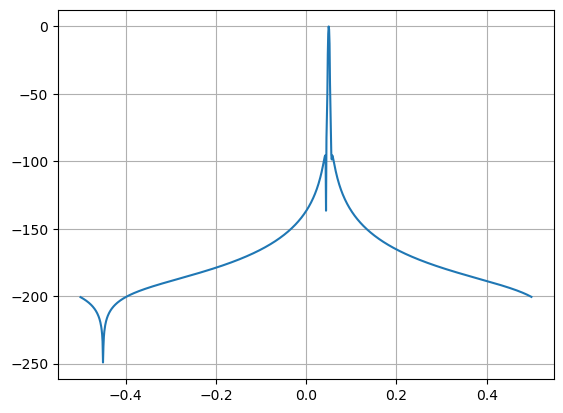

In [178]:
N = 2**10
n = np.arange(N)
F = 0.05
AdB = 100
perc = 0.15
Fmax = 0.5 * (1 - perc)

xi_test = (1 - 2**-11)*np.cos(2*np.pi*F*n)
xq_test = (1 - 2**-11)*np.sin(2*np.pi*F*n)
xiq_test = xi_test + 1j*xq_test

freqs_test, xfftdB_test, an_ = fftdB(xiq_test, True)
plt.figure()
plt.plot(freqs_test, xfftdB_test)
plt.grid()
plt.show()

In [179]:
np.savetxt("../../../../VHDL/data/rfTransmitter_test/xin_i_test.txt", xi_test, fmt="%.12f")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/xin_q_test.txt", xq_test, fmt="%.12f")

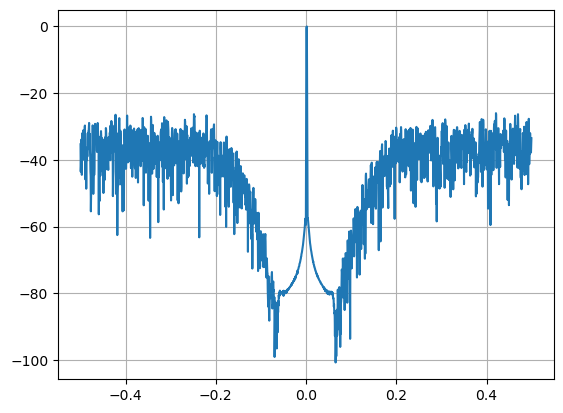

In [53]:
# xout_i_stage1 = np.loadtxt("../../data/input/xinI_000_f0p010.txt")
# xout_q_stage1 = np.loadtxt("../../data/input/xinQ_000_f0p010.txt")

xout_i_stage1 = np.loadtxt("../../data/output/stage1/xout_i_stage1_000_f0p010.txt", dtype=np.int32)
xout_q_stage1 = np.loadtxt("../../data/output/stage1/xout_q_stage1_000_f0p010.txt", dtype=np.int32)
# xout_i_stage1 = np.loadtxt("../../VHDL/data/rfTransmitter_test/xout_i_stage1.txt", dtype=np.int32)
# xout_q_stage1 = np.loadtxt("../../VHDL/data/rfTransmitter_test/xout_q_stage1.txt", dtype=np.int32)
xout_iq_stage1 = xout_i_stage1 + 1j*xout_q_stage1

freq_out_stage1, xfftdB_out_stage1, an = fftdB(xout_iq_stage1, True)
plt.figure()
plt.plot(freq_out_stage1, xfftdB_out_stage1)
plt.grid()

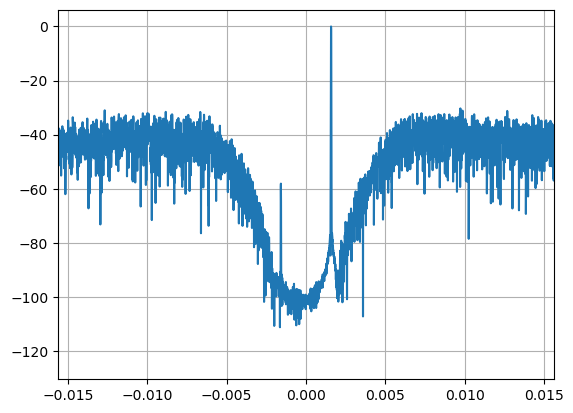

In [45]:
xout_i_stage2 = np.loadtxt("../../data/output/stage2/xout_i_stage2_001_f0p405.txt", dtype=np.int32)
xout_q_stage2 = np.loadtxt("../../data/output/stage2/xout_q_stage2_001_f0p405.txt", dtype=np.int32)
# xout_i_stage2 = np.loadtxt("../../VHDL/data/rfTransmitter_test/xout_i_stage2.txt", dtype=np.int32)
# xout_q_stage2 = np.loadtxt("../../VHDL/data/rfTransmitter_test/xout_q_stage2.txt", dtype=np.int32)
xout_i_stage2 = np.where(xout_i_stage2 == 0, -1, 1)
xout_q_stage2 = np.where(xout_q_stage2 == 0, -1, 1)
xout_iq_stage2 = xout_i_stage2 + 1j*xout_q_stage2

freq_out_stage2, xfftdB_out_stage2, an = fftdB(xout_iq_stage2, True)
plt.figure()
plt.plot(freq_out_stage2, xfftdB_out_stage2)
plt.xlim([-0.5/32, 0.5/32])
plt.grid()

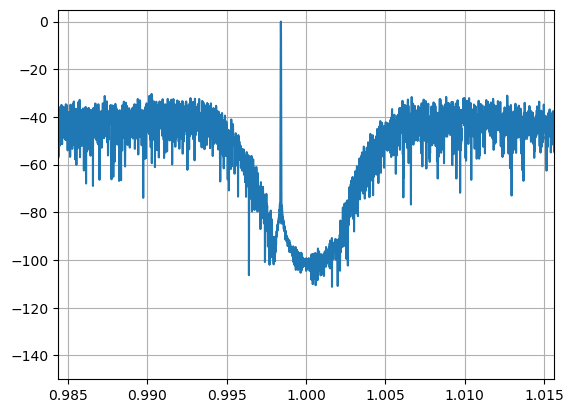

In [46]:
xout_stage3 = np.loadtxt("../../data/output/stage3/xout_stage3_001_f0p405.txt", dtype=np.int32)
# xout_stage3 = np.loadtxt("../../VHDL/data/rfTransmitter_test/xout_stage3.txt", dtype=np.int32)
xout_stage3 = np.where(xout_stage3 == 0, -1, 1)

freq_out_stage3, xfftdB_out_stage3, an = fftdB(xout_stage3, True)
freq_out_stage3 *= 4
plt.figure()
plt.plot(freq_out_stage3, xfftdB_out_stage3)
plt.xlim([1-0.5/32, 1+0.5/32])
plt.ylim([-150, 5])
plt.grid()

# Delay in Python

In [297]:
xi_osr8 = np.loadtxt("../../../../VHDL/data/stage1_test/xout_i_osr8.txt", dtype=np.int32)*2**-15
xq_osr8 = np.loadtxt("../../../../VHDL/data/stage1_test/xout_q_osr8.txt", dtype=np.int32)*2**-15

delta = 1/8/32
i_delta = -delta
q_delta = delta
k7 = np.array([1, -9, +45, 0, -45, +9, -1]) / 60.0

xi_delay = frac_delay_1st(xi_osr8*1/(1+delta), i_delta, k7)
xq_delay = frac_delay_1st(xq_osr8*1/(1+delta), q_delta, k7)

np.savetxt("../../../../VHDL/data/delay_test/xin_i_delay.txt", xi_test, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/xin_q_delay.txt", xq_test, fmt="%.12f")

In [298]:
print(np.max(xi_osr8), np.min(xi_osr8))
print(np.max(xq_osr8), np.min(xq_osr8))

print(np.max(xi_delay), np.min(xi_delay))
print(np.max(xq_delay), np.min(xq_delay))

0.999969482421875 -1.0
0.99951171875 -1.0
0.9961188171624209 -0.9961255104470655
0.9956225680933852 -0.9961201253413535
